In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import czifile as zis
from apeer_ometiff_library import io, processing, omexmlClass
import os
from matplotlib import pyplot as plt, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.viewer import ImageViewer
import skimage.io
import matplotlib.colors as colors
import numpy as np
#from skimage.external import tifffile
import ipywidgets as widgets

import imgfileutils as imf

In [2]:
basefolder = r'/datadisk1/tuxedo/IPython_Notebooks/testdata'
#basefolder = r'/home/sebi06/testdata'

#filename = os.path.join(basefolder, 'Filter_with_Particles_big.ome.tiff')
filename = os.path.join(basefolder, 'S=2_T=5_CH=3_CH=2_A2.ome.tiff')
#filename = os.path.join(basefolder, 'Osteosarcoma_01.ome.tiff')
#filename = os.path.join(basefolder, 'Filter_with_Particles_big.czi')
#filename = os.path.join(basefolder, '8Brains_DAPI_5X_stitched.czi')
#filename = os.path.join(basefolder, 'S=2_T=5_Z=3_CH=2_A2.czi')

In [3]:
image_name = os.path.basename(filename)

if filename.lower().endswith('.ome.tiff') or filename.lower().endswith('.ome.tif'):
    
    # Return value is an 5D Array of order (T, Z, C, X, Y)
    (array5d, omexml) = io.read_ometiff(filename)
   

metadata = imf.get_metadata(filename, series=0)

Image Type:  ometiff
Getting OME-TIFF Metadata ...


In [4]:
array5d.shape

(5, 3, 2, 1216, 1216)

In [5]:
metadata

{'Directory': '/datadisk1/tuxedo/IPython_Notebooks/testdata',
 'Filename': 'S=2_T=5_CH=3_CH=2_A2.ome.tiff',
 'Name': 'S=2_T=5_Z=3_CH=2_A2.czi #1',
 'AcqDate': '2014-08-27T10:51:22.039',
 'TotalSeries': 1,
 'SizeX': 1216,
 'SizeY': 1216,
 'SizeZ': 3,
 'SizeC': 2,
 'SizeT': 5,
 'DimOrder BF': 'XYCZT',
 'NA': '0.025',
 'ObjMag': '1.0',
 'ObjID': 'Objective:1',
 'XScale': 1.0,
 'YScale': 1.0,
 'ZScale': 3.0,
 'XScaleUnit': 'µm',
 'YScaleUnit': 'µm',
 'ZScaleUnit': 'µm',
 'DetectorModel': None,
 'DetectorName': [],
 'DetectorID': 'Detector:Camera',
 'InstrumentID': 'Instrument:0',
 'Channels': ['DAPI', 'EGFP'],
 'ImageIDs': [0]}

Min-Max (Current Plane): 0 - 255


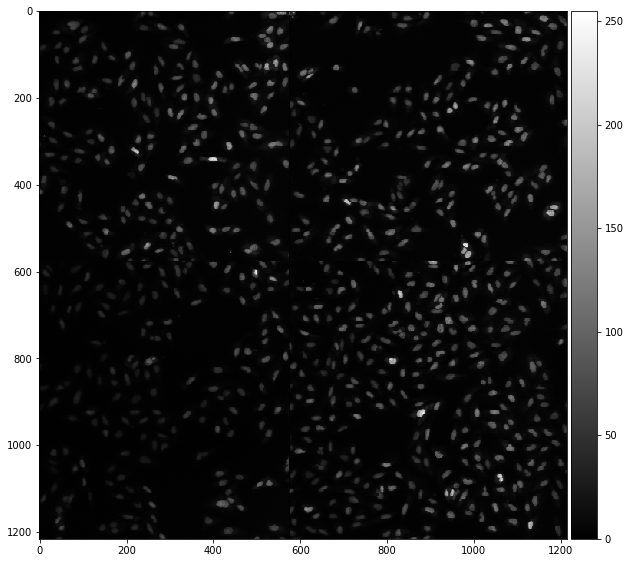

Output()

In [8]:
#out = widgets.interactive_output(get_TZC, { 't': t, 'z': z, 'c': c, 'r':r})
ui, out = imf.create_ipyviewer(array5d, metadata)

display(ui, out)